# Reduction of photo resolution

In [64]:
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

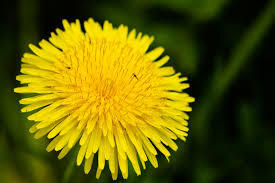

In [65]:
image = cv2.imread("/content/mlecz.jpg")
cv2_imshow(image)

In [66]:
image_df = pd.DataFrame(image.reshape(-1,3), columns=["b","g","r"])
image_df.sample(20)

,b,g,r
14148,22,209,253
25134,9,157,227
10342,3,81,50
15904,0,25,12
13825,0,178,227
26280,6,189,231
8324,3,234,255
33511,4,15,5
35533,16,195,222
14605,0,98,88


We will simplify the picture to 8 colors. Train the KMeans model on the above dataset. Print out the centers of the clusters and their colors.

In [67]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50325 entries, 0 to 50324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   b       50325 non-null  uint8
 1   g       50325 non-null  uint8
 2   r       50325 non-null  uint8
dtypes: uint8(3)
memory usage: 147.6 KB


In [68]:
# Create K-means model
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, n_init = 10)
kmeans.fit(image_df)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

Now let's visualize our cluster centers:

In [69]:
cluster_centers_list = cluster_centers.tolist()
colors = cluster_centers_list

for color in colors:
  cv2_imshow(np.array(color*400).reshape(20,20,3))


The colors above are the centers of our clusters. Finish the task.

In [70]:
# replace the colors in the image with the colors corresponding to the centers of the clusters
cluster_assignments = kmeans.predict(image_df)
modified_image_df = pd.DataFrame(cluster_centers[cluster_assignments], columns=image_df.columns).round().astype(int)
modified_image_df

,b,g,r
0,1,13,5
1,1,13,5
2,1,13,5
3,1,13,5
4,1,13,5
...,...,...,...
50320,1,13,5
50321,1,13,5
50322,1,13,5
50323,1,13,5


In [71]:
image.shape

(183, 275, 3)

In [72]:
modified_image = modified_image_df.to_numpy().reshape(image.shape).astype(np.uint8)
modified_image.shape

(183, 275, 3)

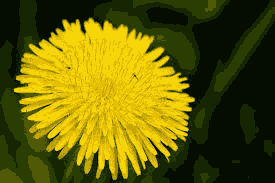

In [73]:
# simplified photo up to 8 colors (3 bits)
cv2_imshow(modified_image)